In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [9]:
f = h5py.File('two_bubbles_den_4.h5','r')
dataset = list(f.keys())[0]
dset = f[dataset]
attrs = list(dset.attrs)

The dset is ordered as [z,y,x, component].

In [84]:
f.close()

In [77]:
dset

<HDF5 dataset "two_bubbles_den_0.h5": shape (64, 64, 64, 3), type "<f4">

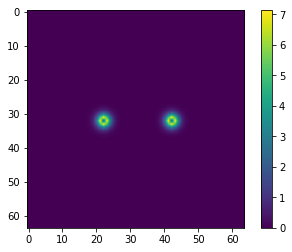

In [10]:
plt.imshow(dset[32,:,:,2], interpolation = 'bilinear')
plt.colorbar()
plt.show()

In [30]:
dset[17,17,16,2], dset[15,15,16,2]

(4.7560987, 4.7560987)

In [60]:
228+228+178+291

925